In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from datetime import datetime, timedelta
import bisect
import pandas as pd
import seaborn as sns
import pylab
import os
import glob
from ftplib import FTP
import fnmatch
import matplotlib.dates as mdates
import xarray as xr
#plot(x,y)
'''Optional: Specify the plotting style '''
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 15,\
                     'xtick.labelsize' : 15,\
                     'ytick.labelsize' : 15,\
                     'axes.titlesize' : 16,\
                     'axes.labelsize' : 16,\
                     'date.autoformatter.minute': '%H:%M' })

In [2]:
from netCDF4 import Dataset
import sys
#from mpl_toolkits.basemap import Basemap

In [24]:
#nc=Dataset('ivm20200101.nc')
ds1=xr.open_dataset('ivm20200101.nc')
ds1=ds1.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
ds1=ds1[[ 'time_ms',
                   'vmer',
                   'vzon',
                   'Ni',
                  'orb_num',
                  'slt',
                   'lon',
                   'lat',
                  'alt',
                   'mlon',
                 'mlat',
                   'DM_flag',
                 'RPA_flag']]
#DM_Flag==0:good quality data
#ds1 = ds1.where(ds1.DM_Flag == 0)

ds1

<xarray.Dataset>
Dimensions:   (time_ms: 86400)
Coordinates:
  * time_ms   (time_ms) int64 1577836797776 1577836798776 ... 1577923195923
Data variables:
    vmer      (time_ms) float64 ...
    vzon      (time_ms) float64 ...
    Ni        (time_ms) float64 ...
    orb_num   (time_ms) float64 ...
    slt       (time_ms) float32 ...
    lon       (time_ms) float32 ...
    lat       (time_ms) float32 ...
    alt       (time_ms) float32 ...
    mlon      (time_ms) float32 ...
    mlat      (time_ms) float32 ...
    DM_flag   (time_ms) int64 ...
    RPA_flag  (time_ms) int64 ...
Attributes: (12/45)
    Discipline:                  Space Physics > Ionospheric Science
    Link_Title:                  ICON IVM
    Mission_Group:               Ionospheric Investigations
    Source_Name:                 ICON > Ionospheric Connection Explorer
    Data_Level:                  L2
    ADID_Ref:                    NASA Contract > NNG12FA45C
    ...                          ...
    pysat_version:               2.2.2
    File:                        ['/disks/icondata/Temporary/ICON.SDC.Pipelin...
    rpa_multi_fit_map:           1
    Generation_Date:             20220421
    Rules_of_Use:                Public Data for Scientific Use
    MOD:                         ['Version 001, R. A. Stoneback, 2019-08-06T0...

In [9]:
ds1['slt']=ds1['slt']*1000000

In [10]:
empty = xr.full_like(ds1.isel(time_ms= 86399), 0)

#x_bins = np.r_[10.794853:9.081341:0.005950]
dsg=ds1.groupby_bins("slt", 5950).mean()#reduce((mean, ['vmer','vzon']))#.mean(dim="vmer")

In [12]:
dsg['slt']=dsg['slt']/1000000

In [25]:
for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        bil='C:\\Users\\lynnl\\icon\\ivm\\icon_l2-7_ivm-a_202001'+j+'_v06r000.nc'#PRISM_ppt_stable_4kmM2_'+str(i)+j+'_bil.bil'#
        ds=xr.open_dataset(bil)
        ds=ds.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
        ds2=ds2[[ 'time_ms',
                   'vmer',
                   'vzon',
                   'Ni',
                  'orb_num',
                  'slt',
                   'lon',
                   'lat',
                  'alt',
                   'mlon',
                 'mlat',
                   'DM_flag',
                 'RPA_flag']]
        ds1=xr.merge([ds1, ds])
        ##df1 = pd.DataFrame(data={'year':year,'month':month,'min': np.nanmin(data1), 'max': np.nanmax(data1),'mean':np.nanmean(data1),'median':np.nanmedian(data1),'std':np.nanstd(data1)},index=[0])
        ##df1
        ##df0=pd.concat([df0, df1]) 
ds1

FileNotFoundError: [Errno 2] No such file or directory: b'/home/jovyan/ICON/C:\\Users\\lynnl\\icon\\ivm\\icon_l2-7_ivm-a_20200101_v06r000.nc'

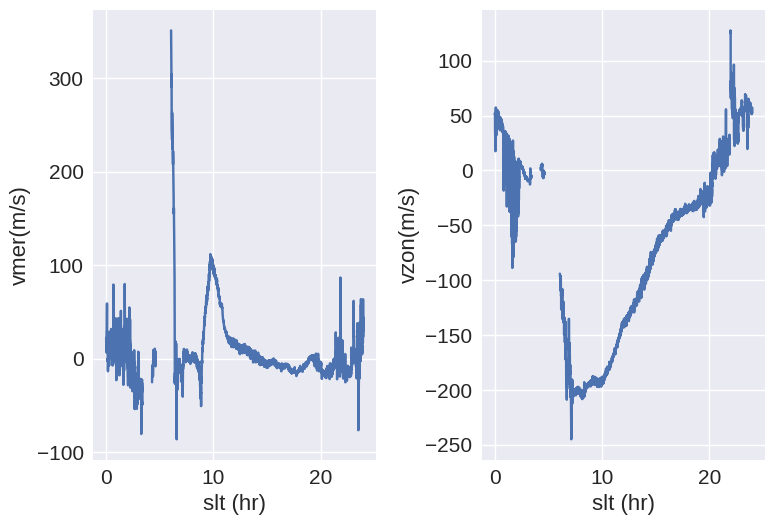

In [26]:
plt.subplot(1, 2, 1)
plt.plot(dsg['slt'],dsg['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(dsg['slt'],dsg['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout()

In [29]:
dsg.where(['vmer'==0])['slt']

<xarray.DataArray 'slt' (slt_bins: 5950)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * slt_bins  (slt_bins) object (-23827.646, 4205.277] ... (23995546.869, 239...

share axis plotting
fig, axs = plt.subplots(3, sharex=True, sharey=True)

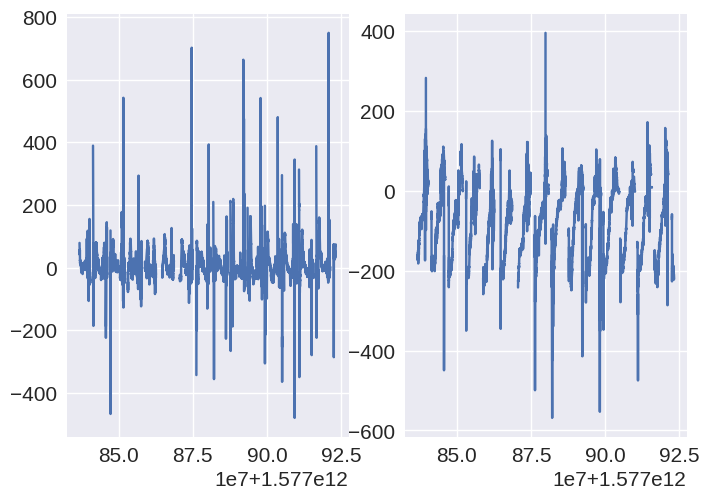

In [14]:
plt.subplot(1, 2, 1)
plt.plot(ds1['time_ms'],ds1['vmer']);#northsouth

plt.subplot(1, 2, 2)
plt.plot(ds1['time_ms'],ds1['vzon']);#eastwest

In [6]:
len(ds1)

12

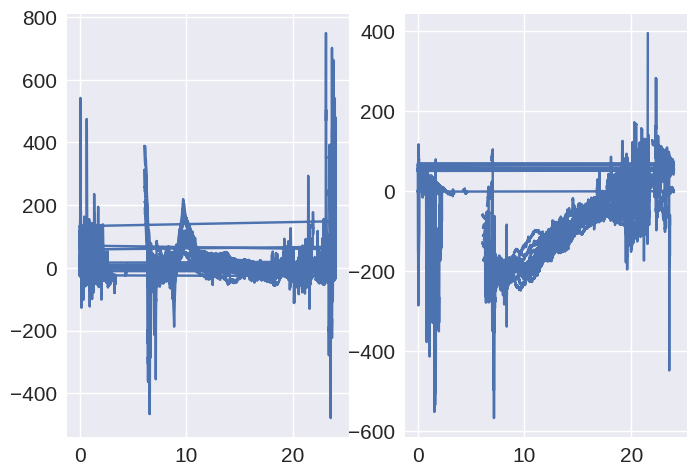

In [5]:
#local time vzon
plt.subplot(1, 2, 1)
plt.plot(ds1['slt'],ds1['vmer']);

#xaxis horizontal lines not real data
#split lines and find the ave behavior
plt.subplot(1, 2, 2)
plt.plot(ds1['slt'],ds1['vzon']);

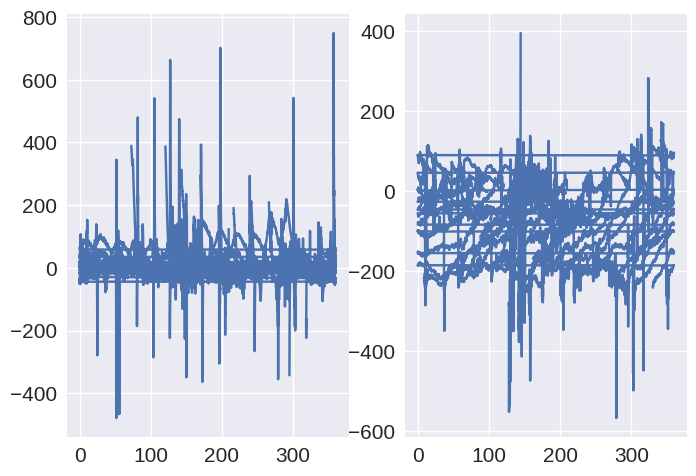

In [6]:
plt.subplot(1, 2, 1)
plt.plot(ds1['lon'],ds1['vmer']);

plt.subplot(1, 2, 2)
plt.plot(ds1['lon'],ds1['vzon']);

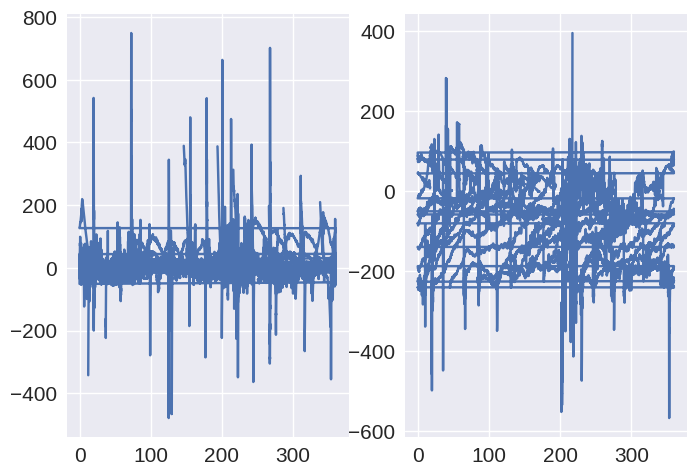

In [7]:
plt.subplot(1, 2, 1)
plt.plot(ds1['mlon'],ds1['vmer']);

plt.subplot(1, 2, 2)
plt.plot(ds1['mlon'],ds1['vzon']);

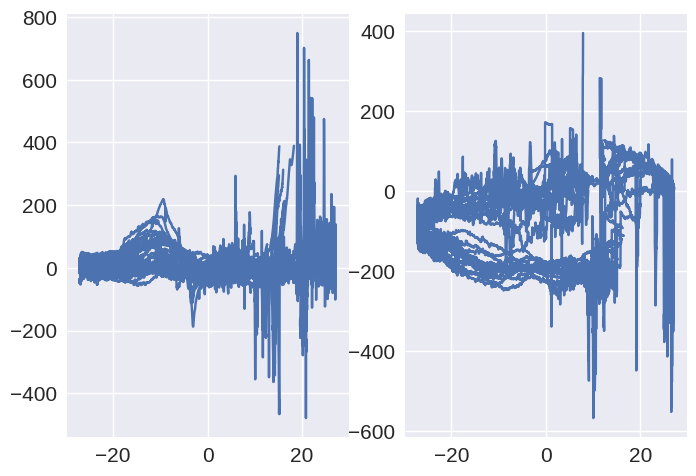

In [8]:
plt.subplot(1, 2, 1)
plt.plot(ds1['lat'],ds1['vmer']);

plt.subplot(1, 2, 2)
plt.plot(ds1['lat'],ds1['vzon']);

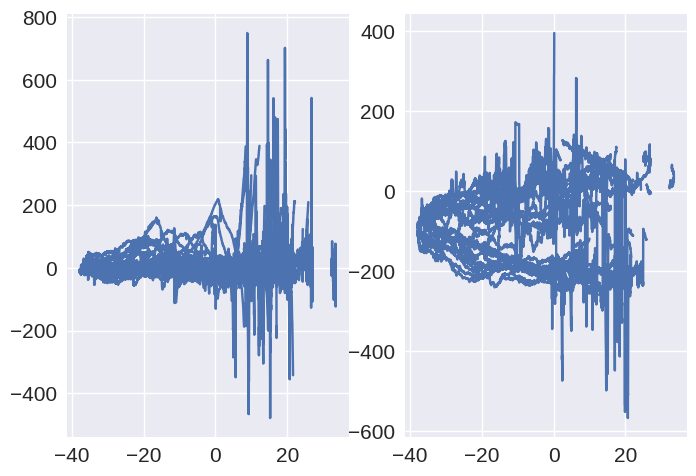

In [9]:
plt.subplot(1, 2, 1)
plt.plot(ds1['mlat'],ds1['vmer']);

plt.subplot(1, 2, 2)
plt.plot(ds1['mlat'],ds1['vzon']);

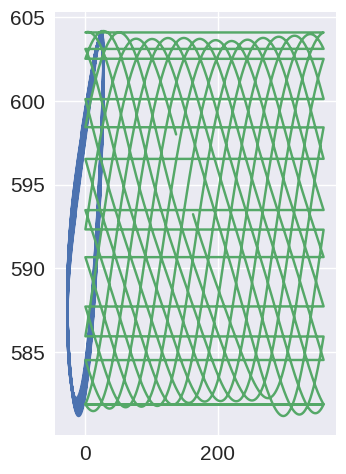

In [10]:
plt.subplot(1, 2, 1)
plt.plot(ds1['lat'],ds1['alt']);

plt.subplot(1, 2, 1)
plt.plot(ds1['lon'],ds1['alt']);

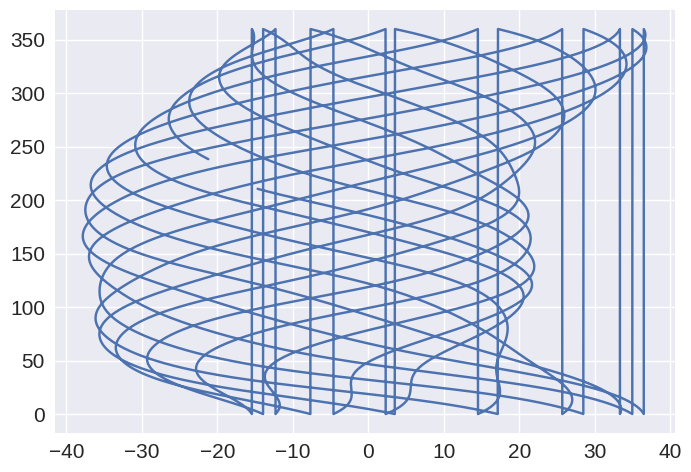

In [11]:
plt.plot(ds1['mlat'],ds1['mlon']);

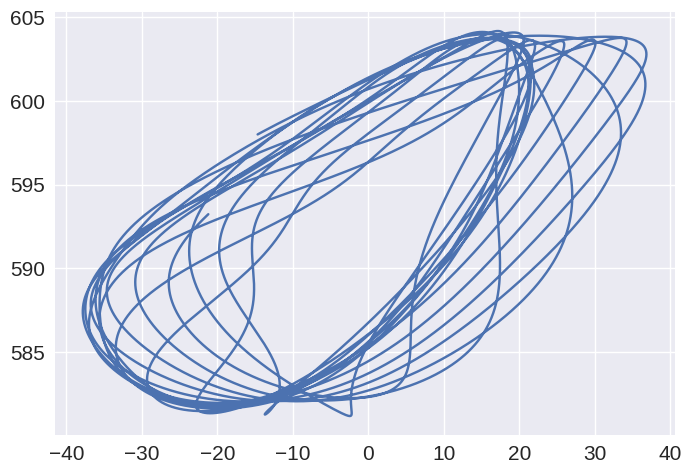

In [12]:
plt.plot(ds1['mlat'],ds1['alt']);

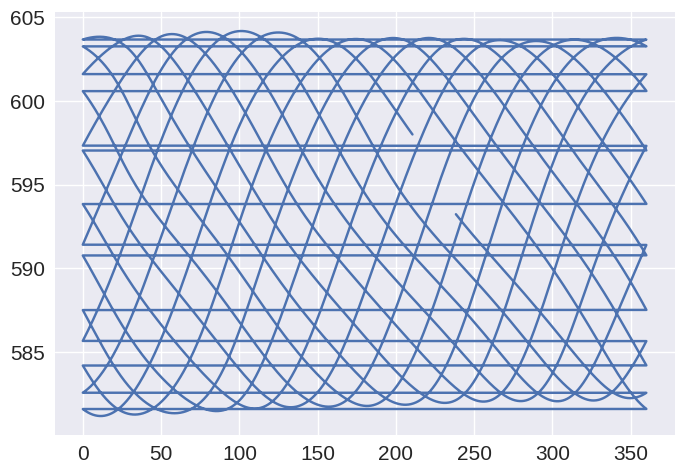

In [13]:
plt.plot(ds1['mlon'],ds1['alt']);

In [14]:
ds2=xr.open_dataset('ivm20200102.nc')
ds2=ds2.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })

#downsize every 10seconds
#To downsample: ds3 = ds2.isel(time_ms = slice(None, None, 10))

ds2=ds2[[ 'time_ms',
                   'vmer',
                   'vzon',
                   'Ni',
                  'orb_num',
                  'slt',
                   'lon',
                   'lat',
                  'alt',
                   'mlon',
                 'mlat',
                   'DM_flag',
                 'RPA_flag']]

In [ ]:
#df0=pd.DataFrame({'A' : []})
for i in range(1895,1981):
    for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        bil='C:\\Users\\lynnl\\icon\\ivm\\icon_l2-7_ivm-a_202001'+j+'_v06r000.nc'#PRISM_ppt_stable_4kmM2_'+str(i)+j+'_bil.bil'#
        ds=xr.open_dataset(bil)
        ds=ds.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
        ds2=ds2[[ 'time_ms',
                   'vmer',
                   'vzon',
                   'Ni',
                  'orb_num',
                  'slt',
                   'lon',
                   'lat',
                  'alt',
                   'mlon',
                 'mlat',
                   'DM_flag',
                 'RPA_flag']]
        ds1=xr.merge([ds1, ds])
        ##df1 = pd.DataFrame(data={'year':year,'month':month,'min': np.nanmin(data1), 'max': np.nanmax(data1),'mean':np.nanmean(data1),'median':np.nanmedian(data1),'std':np.nanstd(data1)},index=[0])
        ##df1
        ##df0=pd.concat([df0, df1]) 
ds1
##df0.to_csv("C:\\Users\\lynnl\\calfire\\189501_198012.csv")
#bil='C:\\Users\\lynnl\\calfire\\PRISM_ppt_stable_4kmM2_189501_198012_bil\\PRISM_ppt_stable_4kmM2_189501_bil.bil'

In [15]:
merge=xr.merge([ds1, ds2])
#try 24/48 windows first
#ds2.close() clear memeory
merge

<xarray.Dataset>
Dimensions:   (time_ms: 172800)
Coordinates:
  * time_ms   (time_ms) int64 1577836797776 1577836798776 ... 1578009595078
Data variables:
    vmer      (time_ms) float64 78.97 77.44 77.52 77.64 ... 16.73 17.06 16.81
    vzon      (time_ms) float64 -170.3 -168.8 -169.3 ... -199.0 -198.2 -197.6
    Ni        (time_ms) float64 6.548e+04 6.546e+04 ... 4.615e+04 4.621e+04
    orb_num   (time_ms) float64 1.225e+03 1.225e+03 ... 1.255e+03 1.255e+03
    slt       (time_ms) float32 10.79 10.79 10.8 10.8 ... 7.422 7.424 7.424
    lon       (time_ms) float32 162.7 162.7 162.7 162.8 ... 112.4 112.4 112.4
    lat       (time_ms) float32 -14.56 -14.56 -14.57 -14.59 ... 2.494 2.48 2.48
    alt       (time_ms) float32 593.2 593.2 593.2 593.2 ... 601.8 601.8 601.8
    mlon      (time_ms) float32 238.3 238.3 238.3 238.4 ... 185.4 185.5 185.5
    mlat      (time_ms) float32 -21.2 -21.2 -21.21 ... -4.87 -4.885 -4.885
    DM_flag   (time_ms) float64 3.0 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0 3.0
    RPA_flag  (time_ms) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/45)
    Discipline:                  Space Physics > Ionospheric Science
    Link_Title:                  ICON IVM
    Mission_Group:               Ionospheric Investigations
    Source_Name:                 ICON > Ionospheric Connection Explorer
    Data_Level:                  L2
    ADID_Ref:                    NASA Contract > NNG12FA45C
    ...                          ...
    pysat_version:               2.2.2
    File:                        ['/disks/icondata/Temporary/ICON.SDC.Pipelin...
    rpa_multi_fit_map:           1
    Generation_Date:             20220421
    Rules_of_Use:                Public Data for Scientific Use
    MOD:                         ['Version 001, R. A. Stoneback, 2019-08-06T0...

In [16]:
ds1

<xarray.Dataset>
Dimensions:   (time_ms: 86400)
Coordinates:
  * time_ms   (time_ms) int64 1577836797776 1577836798776 ... 1577923195923
Data variables:
    vmer      (time_ms) float64 78.97 77.44 77.52 77.64 ... 69.79 69.01 69.87
    vzon      (time_ms) float64 -170.3 -168.8 -169.3 ... -221.9 -221.4 -220.9
    Ni        (time_ms) float64 6.548e+04 6.546e+04 ... 6.724e+04 6.699e+04
    orb_num   (time_ms) float64 1.225e+03 1.225e+03 ... 1.24e+03 1.24e+03
    slt       (time_ms) float32 10.79 10.79 10.8 10.8 ... 9.079 9.081 9.081
    lon       (time_ms) float32 162.7 162.7 162.7 162.8 ... 137.1 137.1 137.1
    lat       (time_ms) float32 -14.56 -14.56 -14.57 ... -6.257 -6.271 -6.271
    alt       (time_ms) float32 593.2 593.2 593.2 593.2 ... 598.0 598.0 598.0
    mlon      (time_ms) float32 238.3 238.3 238.3 238.4 ... 210.5 210.6 210.6
    mlat      (time_ms) float32 -21.2 -21.2 -21.21 ... -14.65 -14.66 -14.66
    DM_flag   (time_ms) int64 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3
    RPA_flag  (time_ms) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes: (12/45)
    Discipline:                  Space Physics > Ionospheric Science
    Link_Title:                  ICON IVM
    Mission_Group:               Ionospheric Investigations
    Source_Name:                 ICON > Ionospheric Connection Explorer
    Data_Level:                  L2
    ADID_Ref:                    NASA Contract > NNG12FA45C
    ...                          ...
    pysat_version:               2.2.2
    File:                        ['/disks/icondata/Temporary/ICON.SDC.Pipelin...
    rpa_multi_fit_map:           1
    Generation_Date:             20220421
    Rules_of_Use:                Public Data for Scientific Use
    MOD:                         ['Version 001, R. A. Stoneback, 2019-08-06T0...

In [17]:
ds1.memory_usage(deep=False)

AttributeError: 'Dataset' object has no attribute 'memory_usage'

df=pd.read_csv('ivm.csv')
df